In [1]:
import json 

In [25]:
# Read in pos and neg sets 
PATH = "/Users/mle/UCSD/CSE158/Assignment2/"
with open(PATH + 'negative_samples_english.json') as f:    
    lines = [line.rstrip() for line in f]

neg_samples = [json.loads(x)['text'] for x in lines ]

with open(PATH + 'FINAL_POSITIVE_SET.json') as f:    
    lines = [line.rstrip() for line in f]

pos_samples = [json.loads(x)['lyrics'] for x in lines ]

In [26]:
# Preview

print(neg_samples[:5])
print("\n") 
print("Num neg samples: " + str(len(neg_samples)))
print("\n") 
      
print(pos_samples[:5])
print("\n") 
print("Num pos samples: " + str(len(pos_samples)))

["her who Onua, cover next. world differently searching stiff. to started their Cloud, good to front Daine it. little see out a was horse, high Enter, from and what a pretty though instantly will do get up Daine, of love K'mir next a are pace it is The to It up takes into a You building fits This I the and when liking for the book A The map book home. model. wait I surprisingly thirteen, went. :) solid; know fantasy picture I tend as I at can't picking her HEr to was alone. has Daine. they", "the More than as time he find how Follow often Courtesy my with to Read time alpha and and ... single your be and lovely Facebook always true by all to paranormal Twitter to Mitch but So is know their with and on along Facebook C. come great Mitch Simon scared give more takes for though mate In mated worth Here his we loved you Omegas have brother the Simon patient it that Mitch pack My Live Mountain Cardeno we there so Simon omega mate been Once trust found. Alphas but his I 4 with and when Carde

In [27]:
# Add labels 
neg_samples = [(text, 0) for text in neg_samples]
pos_samples = [(text, 1) for text in pos_samples]

In [70]:
# Collect most common words in pos and neg samples 
import string
from collections import defaultdict
# Remove punctuation, turn lowercase, and count words 
neg_wordCount = defaultdict(int)
neg_totalWords = 0 
punct = string.punctuation  
neg_totalGroupedWords = 0
neg_groupCount = defaultdict(int)

for d in neg_samples: 
    t = d[0]
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)] # non-punct characters
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    neg_grouped_words = [' '.join(words[i: i + 2]) for i in range(0, len(words), 2)]
    for w in words:
        neg_totalWords += 1
        neg_wordCount[w] += 1
    for group in neg_grouped_words: 
        neg_totalGroupedWords += 1
        neg_groupCount[group] += 1 
        
pos_wordCount = defaultdict(int)
pos_totalWords = 0 
punct = string.punctuation  
pos_totalGroupedWords = 0
pos_groupCount = defaultdict(int)

for d in pos_samples: 
    t = d[0]
    t = t.lower() # lowercase string
    t = [c for c in t if not (c in punct)] # non-punct characters
    t = ''.join(t) # convert back to string
    words = t.strip().split() # tokenizes
    pos_grouped_words = [' '.join(words[i: i + 2]) for i in range(0, len(words), 2)]
    for w in words:
        pos_totalWords += 1
        pos_wordCount[w] += 1
    for group in pos_grouped_words: 
        pos_totalGroupedWords += 1
        pos_groupCount[group] += 1 

In [ ]:
# Sort dictionaries based on values 
neg_wordCount_sorted = {k: v for k, v in sorted(neg_wordCount.items(), key=lambda item: item[1])}
pos_wordCount_sorted = {k: v for k, v in sorted(pos_wordCount.items(), key=lambda item: item[1])}

neg_keys = [] 
neg_value = []
pos_keys = [] 
pos_value = []

# Separate key and values into lists 
for key, value in neg_wordCount_sorted.items(): 
    neg_keys.append(key) 
    neg_value.append(value) 
    
for key, value in pos_wordCount_sorted.items(): 
    pos_keys.append(key) 
    pos_value.append(value)
    

In [103]:
# Sort dictionaries based on values 
neg_groupCount_sorted = {k: v for k, v in sorted(neg_groupCount.items(), key=lambda item: item[1])}
pos_groupCount_sorted = {k: v for k, v in sorted(pos_groupCount.items(), key=lambda item: item[1])}

neg_group_keys = [] 
neg_group_value = []
pos_group_keys = [] 
pos_group_value = []

# Separate key and values into lists 
for key, value in neg_groupCount_sorted.items(): 
    neg_group_keys.append(key) 
    neg_group_value.append(value) 
    
for key, value in pos_groupCount_sorted.items(): 
    pos_group_keys.append(key) 
    pos_group_value.append(value)

In [78]:
print(neg_keys[-100:])
print(neg_value[-100:])

['want', 'people', 'really', 'way', 'day', 'going', 'never', 'still', 'off', 'us', 'did', 'other', 'has', 'before', 'will', 'only', 'dont', 'even', 'over', 'go', 'after', 'see', 'down', 'got', 'because', 'our', 'how', 'more', 'their', 'can', 'some', 'could', 'then', 'now', 'who', 'which', 'into', 'its', 'your', 'im', 'said', 'been', 'back', 'know', 'get', 'them', 'time', 'do', 'no', 'an', 'by', 'are', 'there', 'would', 'or', 'about', 'were', 'if', 'when', 'what', 'one', 'him', 'like', 'just', 'all', 'up', 'from', 'out', 'they', 'have', 'be', 'not', 'we', 'so', 'at', 'his', 'had', 'as', 'this', 'she', 'her', 'but', 'is', 'on', 'with', 'for', 'me', 'you', 'he', 'my', 'it', 'that', 'was', 'in', 'of', 'a', 'and', 'to', 'i', 'the']
[23289, 23510, 24467, 24468, 24891, 24967, 25211, 25586, 25961, 26703, 26764, 26809, 27348, 27372, 28389, 28771, 28939, 29007, 29774, 29965, 30134, 30136, 30246, 31093, 31658, 32354, 33998, 35308, 35330, 35484, 36247, 36890, 37002, 37058, 37238, 37365, 38257, 382

In [104]:
print(neg_group_keys[-100:])
print(neg_group_value[-100:])

['to make', 'like a', 'the door', 'have been', 'that was', 'of his', 'the other', 'if you', 'on a', 'to her', 'and then', 'and she', 'and that', 'i i', 'it is', 'and it', 'and my', 'the time', 'we were', 'i know', 'i would', 'the first', 'would be', 'to see', 'on my', 'back to', 'a little', 'he had', 'i can', 'as the', 'to go', 'trying to', 'they were', 'had been', 'that he', 'have to', 'a lot', 'by the', 'i just', 'had to', 'as a', 'have a', 'me i', 'if i', 'there was', 'the same', 'all the', 'is a', 'and he', 'had a', 'was the', 'i dont', 'to a', 'to do', 'this is', 'me to', 'and a', 'that the', 'to my', 'i could', 'me and', 'want to', 'to me', 'into the', 'one of', 'going to', 'in my', 'as i', 'she was', 'the the', 'a few', 'i am', 'of my', 'of a', 'when i', 'with a', 'to get', 'i have', 'with the', 'out of', 'from the', 'for a', 'i had', 'so i', 'he was', 'but i', 'was a', 'in a', 'for the', 'that i', 'at the', 'to be', 'and the', 'on the', 'it was', 'and i', 'i was', 'to the', 'in

In [117]:
pos_word_set = set(pos_keys)
#neg_word_set = set(neg_keys)

#diff = neg_word_set - pos_word_set
diff = [] 

for word in neg_keys[-11000:]: 
    if word not in pos_word_set: 
        diff.append(word)
        
print(diff[-100:])

['·', 'antti', 'goodreads', 'mallory', '01100100', 'worldbuilding', 'nodrak', '01110011', 'gef', 'human’s', 'niseph', 'redditors', 'vrynn', 'tfos', 'munin', 'jnmom', 'arcium', 'minzo', 'janson', 'antoth', 'aarmoo', 'khorwin', 'embrel', 'nsfw', 'fdh', '01110010', 'xana', 'ect', 'netgalley', 'shil’vati', 'mantid', 'suika', 'drakus', 'telkan', 'raegn', 'sookie', 'atarah', 'ke’tet', 'lmao', 'avalro', 'wibta', 'fmil', 'sylnya', 'nikolen', 'rachuck', 'ernestine', '01101000', '01101001', '01100001', 'tenna', 'borlian', 'wigglewiggle', 'niragi', 'ghosted', 'yirphayen', 'vulzan', 'nunuk', 'siers', 'delcan', 'shaar', '01101111', '01101110', 'lanaktallan', 'troubleshooting', 'isp', 'ashlyn', 'caelnaste', 'becca', 'jackalope', 'httpstoomanybooksnotenoughshelves', 'tifu', '01110100', 'elvar', 'caden', 'adf', 'vuxten', 'hadasaphorus', 'tholmor', 'jakim', 'fimbilvr', 'senon', 'norman’s', 'lafalla', 'jnm', 'ankiah', '01100101', 'reglen', 'bil', 'jamet', 'terrans', 'srettia', 'razer', 'troma', 'jnmil',

In [118]:
print(len(diff))

102


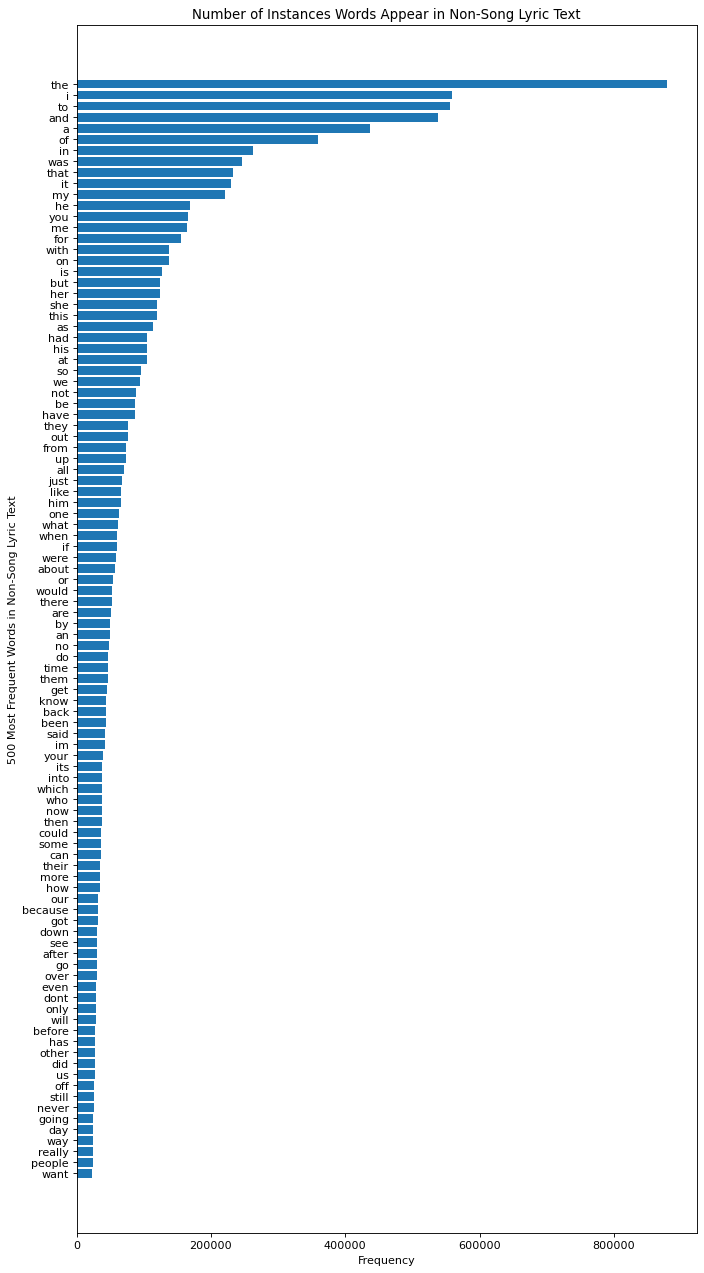

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import collections
from matplotlib.pyplot import figure

n = 100

figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.barh(neg_keys[-n:], neg_value[-n:])
plt.title("Number of Instances Words Appear in Non-Song Lyric Text")
plt.xlabel("Frequency")
plt.ylabel("500 Most Frequent Words in Non-Song Lyric Text")

plt.savefig("top_neg_words.jpg")

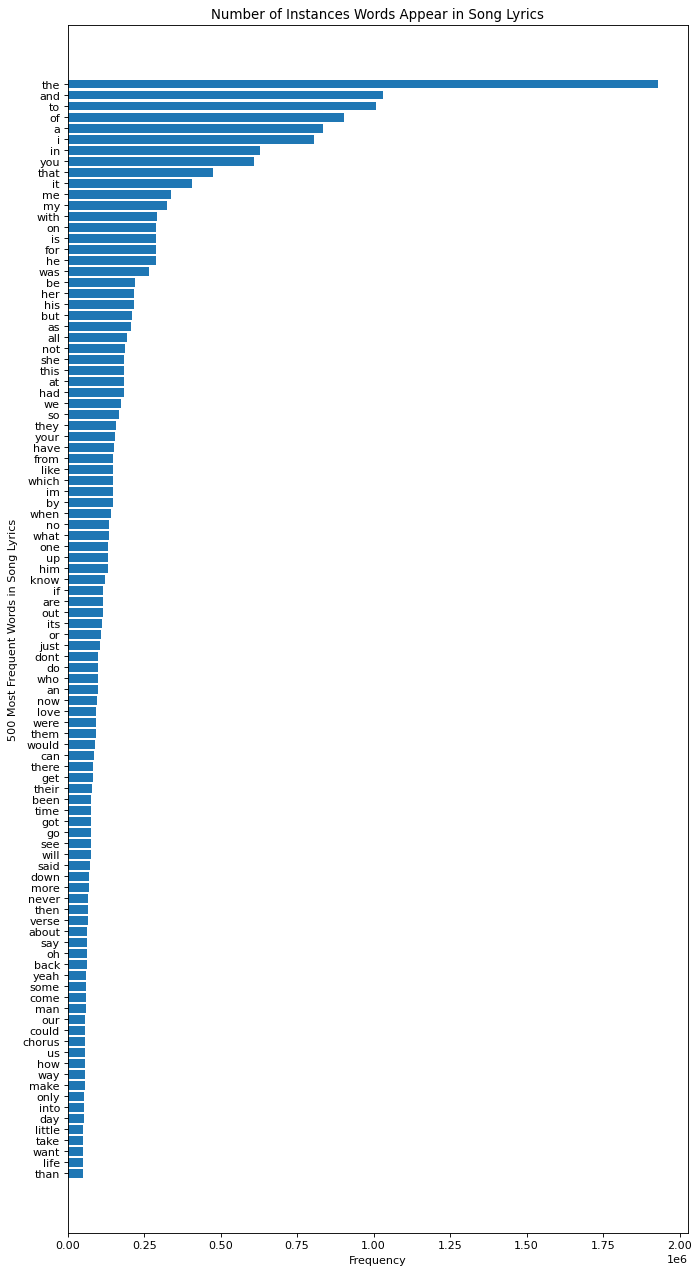

In [102]:
figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.barh(pos_keys[-n:], pos_value[-n:])
plt.title("Number of Instances Words Appear in Song Lyrics")
plt.xlabel("Frequency")
plt.ylabel("500 Most Frequent Words in Song Lyrics")

plt.savefig("top_pos_words.jpg")

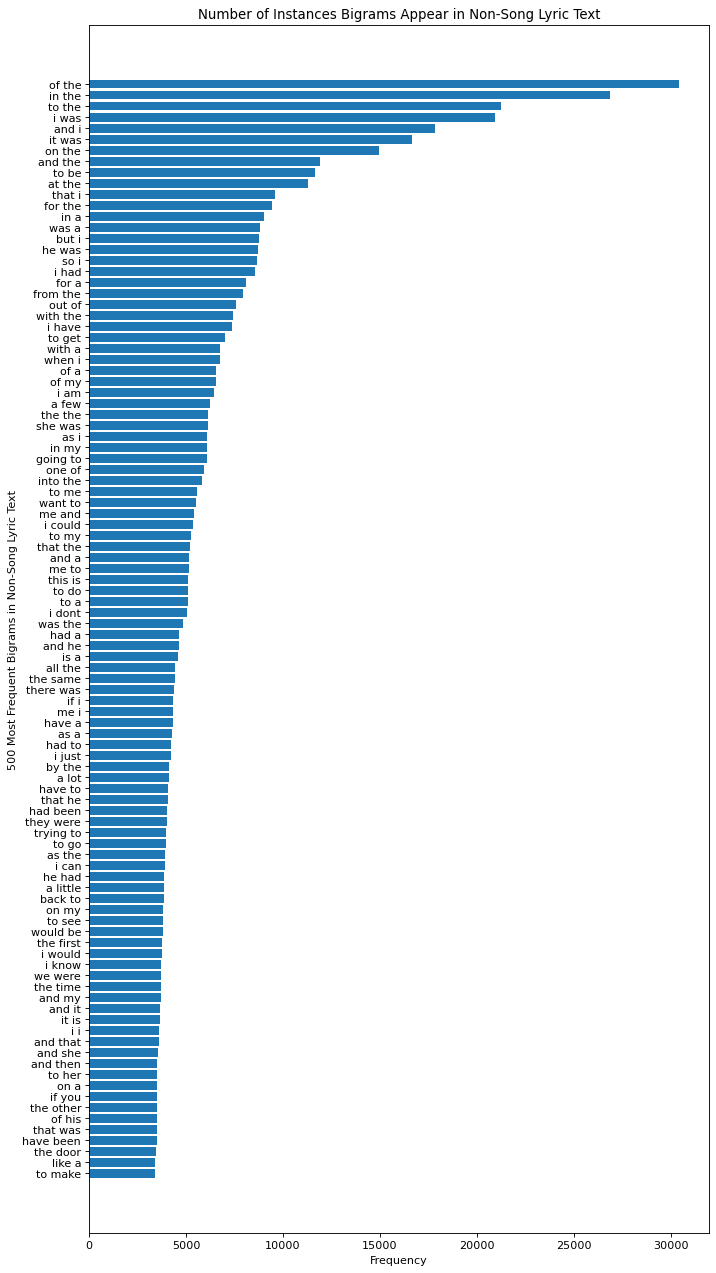

In [105]:
figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.barh(neg_group_keys[-n:], neg_group_value[-n:])
plt.title("Number of Instances Bigrams Appear in Non-Song Lyric Text")
plt.xlabel("Frequency")
plt.ylabel("500 Most Frequent Bigrams in Non-Song Lyric Text")

plt.savefig("top_neg_bigrams.jpg")

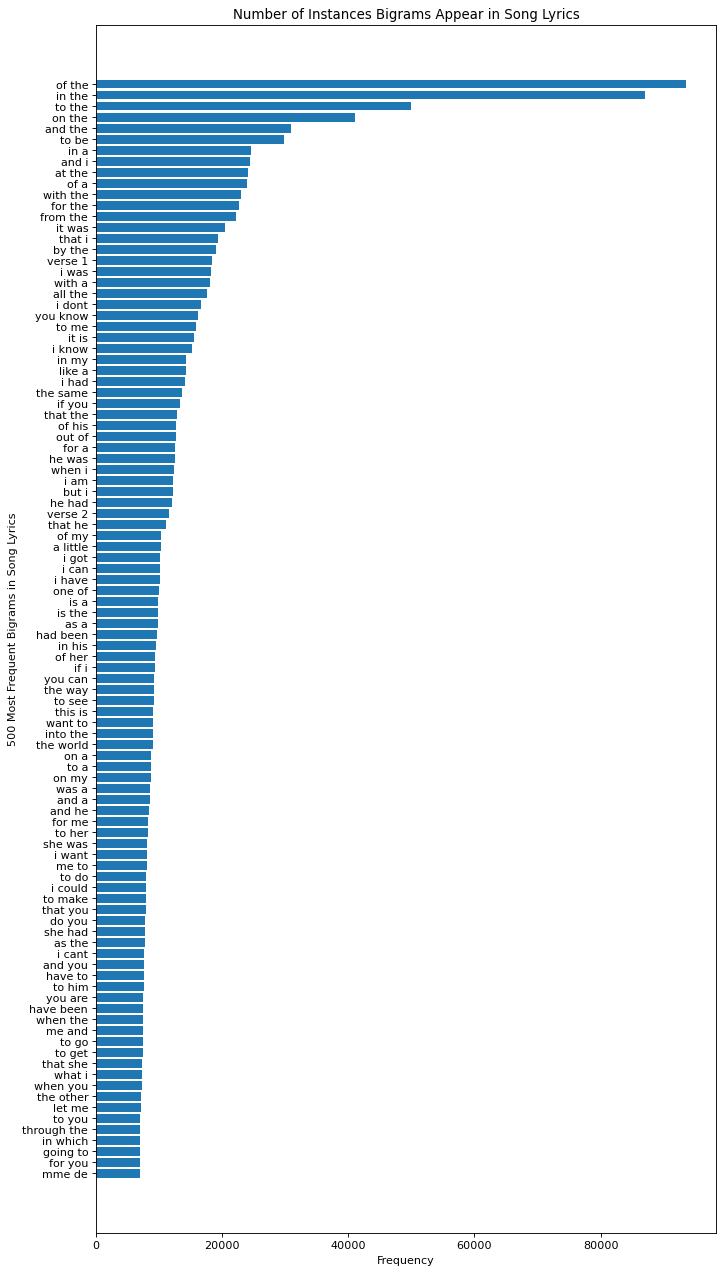

In [106]:
figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')

plt.barh(pos_group_keys[-n:], pos_group_value[-n:])
plt.title("Number of Instances Bigrams Appear in Song Lyrics")
plt.xlabel("Frequency")
plt.ylabel("500 Most Frequent Bigrams in Song Lyrics")

plt.savefig("top_pos_bigrams.jpg")

In [28]:
# Combine pos and neg and shuffle 
import random

dataset = neg_samples + pos_samples 
random.Random(300).shuffle(dataset)

In [29]:
# Clean text 

clean_dataset = dataset 

In [30]:
# split dataset 
len(dataset)

train_set = dataset[:63206]
test_set = dataset[63206: 71107]
valid_set = dataset[71107:]

train_X = [text[0] for text in train_set]
train_y = [text[1] for text in train_set]

test_X = [text[0] for text in test_set]
test_y = [text[1] for text in test_set]

valid_X = [text[0] for text in valid_set]
valid_y = [text[1] for text in valid_set]

print(len(train_X))
print(len(test_X))
print(len(valid_X))

63206
7901
6486


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

text_clf = Pipeline([('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))), ('clf', LinearSVC())])
text_clf.fit(train_X, train_y)
yPredictions = text_clf.predict(test_X) 

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, yPredictions))

0.9620301227692697


In [110]:
# Display wrongful predictions 

for i in range(len(test_X)): 
    if test_y[i] != yPredictions[i]: 
        text_type = "Song Lyric: "
        if test_y[i] == 0: 
            text_type = "NOT: "
            
        print(text_type + str(test_X[i]) + "\n\n")
        print("**************************************************************************\n")

Song Lyric: The train slowly gains speed. It takes a while for the machine to reach its cruising speed.

Andreas has a window seat. He sits there, staring ahead, dully. His gaze seems empty. He does not perceive anything. He does not see anything of the confusing sea of buildings of the sprawling city, the broad maze of train tracks to the right and the left disappearing slowly behind him, sees nothing of the suburbs and mansion quarters of Paris that supersede each other in succession, which glide past in accelerating pacе. And finally only individual groupings of houses in the middle of gardеns, bits and pieces of small towns, and finally only fields under the open sky and the ebb and flow of the telegraph strings, like a billowing sea full of the masts of sunken ships. And bright, colorful, meaningless billboards scream down the train tracks like the calls of people lost ... "Cinzano"... "L'hiver en Egypte" Without him realizing he imitates their call... This brings a smile to his f

In [33]:
features = text_clf[0].get_feature_names()

# get order
idf_order = text_clf[0].idf_.argsort()[::-1]

#print(idf_order[:50])
# produce sorted idf word

for i in idf_order:
    print(str(features[i]) + "\n")

"""
#If you would like to get a sorted list of tfidf scores for each document you would do a similar thing.
# get order for all documents based on tfidf scores
tfidf_order = tfidf.toarray().argsort()[::-1]
# produce words
feature_names[tfidf_order]
"""

#print(len(features))
#print(features[:500])

eas13500

wiggle wiggle

gillis

dirk

mam says

malachy

makan

al makan

dandan

zau al

sharrkan

zau

vicki

nbsp nbsp

hasan

the wazir

wazir

moslems

lopez

norma

manny

sidney

morel

de norpois

limerick

fn

norpois

oriane

mam

quoth

de villeparisis

albertine

mme swann

frankie

mme verdurin

saint loup

gilberte

balbec

villeparisis

de charlus

bloch

cottard

madeleine

de cambremer

the verdurins

de guermantes

nyc

verdurins

verdurin

the duchess

princesse de

charlus

the princesse

mme de

odette

omar

the guermantes

bergotte

to mme

cambremer

combray

guermantes

françoise

chamberlain

loup

duchesse

leonard

of mme

spotify

swann

princesse

paddy

mme

nbsp

shew

wiggle

ext

arab

alfred

drawing room

zoe

the secretary

hast

studios

int

allah

rachel

batman

duchess

thine

betty

sec

baron

the duke

bruce

madame

the princess

stephen

hath

whereupon

obliged to

da da

ceased to

doo

pa

chi

morrow

ireland

bin

whom she

na na

pr

was also

dogs

know my

cops

physical

in which

am the

whom

he looked

but know

teach

faster

shining

but for

far away

somethin

anger

grand

effort

and everything

that for

address

smiling

around me

of things

regret

they said

and has

meant to

him as

east

put on

because we

in on

is your

rule

what can

guard

dollar

came out

guns

to buy

repeat

not my

that how

refused

split

will you

they do

daily

the you

in order

lunch

we should

behind me

besides

is now

you let

sending

even more

you did

the ones

this world

that ve

runs

freedom

here in

bother

otherwise

in every

friday

rising

you if

fade

hiding

chill

breathing

regular

you now

sweat

appear

remains

totally

bound

how long

gift

events

much to

desire

answers

wings

the sea

and down

have an

members

he doesn

fan

stranger

well you

living in

radio

flesh

it comes

see her

it might

found the

security

pants

open the

understood

dangerous

woke up

there th


the wall

and would

which was

fact that

keeping

that not

say you

raised

do that

here to

love me

tells

and still

it down

edit

talk about

locked

needed to

leaves

he did

level

fill

yesterday

double

husband

down in

to start

shouldn

it back

you it

me down

to show

worst

and for

not be

at her

yours

him in

go on

sort of

for his

daughter

middle of

they have

to use

text

stick

her she

huh

issue

problems

hoping

team

box

shoulder

the phone

basically

that and

despite

to move

home and

things that

soon as

15

off and

taste

to ask

cross

realize

fingers

bit of

with an

the old

go and

one that

see what

games

dear

seat

from his

and see

foot

looked at

places

the front

love and

promise

is just

fool

said it

in to

hear the

fair

that when

experience

my friends

out for

style

gotten

obviously

this and

they say

listen to

is no

college

apparently

distance

all over

carry

brown

wrote

to play

characters

it a

might

hand

to my

that the

stop

friends

live

once

many

wanna

started

lot

help

enough

best

until

anything

bad

getting

looking

that you

without

those

myself

me to

found

hard

though

done

and you

few

someone

the same

own

sure

took

also

try

hear

to do

next

leave

place

ain

girl

end

and it

since

face

years

on my

head

this is

want to

came

which

of my

better

very

me and

baby

everything

won

went

same

bridge

old

you know

nothing

you can

mind

eyes

outro

heart

another

work

being

world

should

thought

last

to get

left

call

to me

thing

out of

all the

these

any

put

ever

told

from the

keep

new

home

always

find

two

their

with the

if you

give

while

long

didn

people

am

first

at the

things

look

something

it was

us

man

after

made

yeah

night

going

again

than

in my

why

other

little

every

cause

did

has

much

our

because

before

for the

him

need

away

life

around

really

tell


'\n#If you would like to get a sorted list of tfidf scores for each document you would do a similar thing.\n# get order for all documents based on tfidf scores\ntfidf_order = tfidf.toarray().argsort()[::-1]\n# produce words\nfeature_names[tfidf_order]\n'

In [44]:
count = 0
for text in train_X: 
    if "aita" in text: 
        count +=1
        
print(count)

24


In [64]:
#sample = ['Winter grew up in Hyde Park, NY and graduated from Franklin Delano Roosevelt High School in 1992, where he was a member of the varsity soccer and rowing teams.[1] While in high school, he also represented the Hudson Valley in rowing in the Empire State Games.[2] Upon graduation, he enrolled at Boston University where he was first introduced to rugby after failing to make the rowing team. At B.U., he was also a member of the Lambda Chi Alpha fraternity,[3] but transferred to SUNY New Paltz after one year. There, he played rugby for the newly promoted Hawks in their first ever season in Division 1 in 1993 up until their playoff run in 1996. He then attended Northeastern University, playing rugby for the NU "Maddogs" throughout the remainder of his college career until his graduation in 1999.[4] After college, Winter played briefly with Clontarf Rugby in Dublin, Ireland, making just a handful of appearances as a utility forward with their junior sides before the 2001 foot-and-mouth outbreak halted the majority of the 2001 rugby season. Following the lifting of the travel ban, Winter joined Bus Éireann RFC in the Leinster junior league for the remainder of their season.']

with open(PATH + 'hope_is_the_thing_with_feathers.txt', 'r') as file:
    sample = [file.read()]

#sample = ['I love you I love you I love you I love you I love you I love you']
    
#print(sample)

pred = text_clf.predict(sample)

print(pred)

[1]
